# Text Preprocessing 

<br/><br/>In this notebook we are going to perform a few basic text preprocessing steps on the extracted data. 

In [25]:
# Import some import-worthy things 
import numpy as np
import pandas as pd 
import re
# For some Plottery on the fly
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Some stuff the help me with the debugging 
_GLOBAL_DEBUG_ = True 
# Note to self - I really need to start using Python Logger!!! 

### Load the data in a Pandas DataFrame 

<br/>Initially we will work with just 1,000 entries and scale up later. 

In [3]:
# Let's load a small subset of the June data. 
# We will work on it, test it, verify it
# Once confident, we will apply all the steps to the whole dataset.

"""
header : int, list of int, default ‘infer’
    Row number(s) to use as the column names, and the start of the data. 
index_col : int, str, sequence of int / str, or False, default None
    Column(s) to use as the row labels of the DataFrame, either given as string name or column index.
usecols : list-like or callable, optional
    Return a subset of the columns. If list-like, all elements must either be positional 
    (i.e. integer indices into the document columns) or strings that correspond to column names 
    provided either by the user in names or inferred from the document header row(s).    
prefix : str, optional
    Prefix to add to column numbers when no header, e.g. ‘X’ for X0, X1, …
nrows : int, optional
    Number of rows of file to read. Useful for reading pieces of large files.    
"""
raw_text_df = pd.read_csv('./data/60_days_of_udacity_june.csv', 
                          header=0, usecols=['message'], nrows=1000)

# This little bit of pandas hackery will ensure that we get to see all the columns
# and rows, whenever a dataframe is printed 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

if _GLOBAL_DEBUG_:
    print(raw_text_df.shape)

raw_text_df.head(10)

(1000, 1)


,message
0,\n@akshit has joined the channel\n \n
1,\n@aleksandra.mozejko has joined the channel\n
2,\n@161210032 has joined the channel\n \n@16121...
3,\n@ziad.esam.ezat has joined the channel\n \n@...
4,"\n@ziad.esam.ezat No , i didn't find a way . i..."
5,\n@rekha.chandrasekaran2 has joined the channel\n
6,\n@aleksandra.mozejko has joined the channel\n
7,\n@abhinav.raj116 has joined the channel\n \nT...
8,\n@rupeshpurum has joined the channel\n
9,\n@amatseshe has joined the channel\n \nI'm ex...


### Preprocess Text
<br/>We are going to preprocess text now. Following preprocessing steps are going to get applied, 
<br/>
1. Lowercase all text messages 
2. Replace URLs with a space 
3. Replace usernames with a space 
4. Replace all special characters with a space 

In [4]:
# 1
# Lowercase all message strings 
raw_text_df['message'] = raw_text_df['message'].str.lower()
raw_text_df.head()

,message
0,\n@akshit has joined the channel\n \n
1,\n@aleksandra.mozejko has joined the channel\n
2,\n@161210032 has joined the channel\n \n@16121...
3,\n@ziad.esam.ezat has joined the channel\n \n@...
4,"\n@ziad.esam.ezat no , i didn't find a way . i..."


In [5]:
# 2 
# Replace URLs with a space " "
# This nasty regex string covers ALL the edge cases for a URL 
re_string = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'

# Before we go around removing links from the data, 
# we need to have a way to VERIFY if our regex removal 
# system as worked or not. 
# VERIFICATION is a very important aspect of data preproccessing. 

# A simple method would be find the messages containing links using the same regex string 
# After removal, we should not find anything using the same string. 
print(f'Messages containing links = {sum(raw_text_df["message"].str.contains(re_string, regex=True).astype(int))}')

# Let's remove the links 
raw_text_df['message'] = raw_text_df['message'].replace(to_replace=re_string, value=' ', regex=True)

# Let's try again and see if we can find any messages containing links to verify 
# A value of 0 should indicate that we have been successful! 
print(f'Messages containing links after removal = {sum(raw_text_df["message"].str.contains(re_string, regex=True).astype(int))}')


Messages containing links = 76
Messages containing links after removal = 0


C:\Anaconda3\envs\my_NLP\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
C:\Anaconda3\envs\my_NLP\lib\site-packages\ipykernel_launcher.py:20: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [6]:
# 3
# Usernames don't really add any semantic meaning for the machine 
# Therefore, replace all usernames with a space 
raw_text_df['message'] = raw_text_df['message'].replace(to_replace=r'@(\S)*', value=' ', regex=True)

raw_text_df['message'].head(10)

0                      \n  has joined the channel\n \n
1                         \n  has joined the channel\n
2    \n  has joined the channel\n \n  set the chann...
3    \n  has joined the channel\n \n  isn't there a...
4    \n  no , i didn't find a way . if   can help i...
5                         \n  has joined the channel\n
6                         \n  has joined the channel\n
7    \n  has joined the channel\n \nthis is my firs...
8                         \n  has joined the channel\n
9    \n  has joined the channel\n \ni'm excited for...
Name: message, dtype: object

In [7]:
# 4
# Remove all the special characters except for letters and numbers with a space
raw_text_df['message'] = raw_text_df['message'].replace(to_replace=r'[^0-9a-z]+', value=' ', regex=True)

raw_text_df['message'].head(10)

0                              has joined the channel 
1                              has joined the channel 
2     has joined the channel set the channel topic ...
3     has joined the channel isn t there a way we c...
4     no i didn t find a way if can help in finding...
5                              has joined the channel 
6                              has joined the channel 
7     has joined the channel this is my first time ...
8                              has joined the channel 
9     has joined the channel i m excited for 60 day...
Name: message, dtype: object

### Text Preprocessing Routine 
<br/>Looks like we did a good job up there. Time to put everything together into a 
_one-routine-to-process-them-all_. 

In [17]:
def text_preprocess(df, column='message'):
    """
    Text preprocessing routine. Performs the following 
    steps on the data,
    1. Lowercase all text messages
    2. Replace URLs with a space
    3. Replace usernames with a space
    4. Replace all special characters with a space    
    
    Parameters
    ----------
    df : Pandas DataFrame   
        Unprocessed dataframe
    
    column : string 
        Column name that is going to be processed
   
    Returns
    -------
    df : Post processed dataframe 
    """
    # Debug Flag
    _LOCAL_DEBUG_ = True
    
    # 1
    # Lowercase all message strings 
    df[column] = df[column].astype(str).str.lower()
    # 2 
    # Replace URLs with a space " "
    re_string = r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})'
    df[column] = df[column].replace(to_replace=re_string, value=' ', regex=True)
    # 3
    # Replace all usernames with a space 
    df[column] = df[column].replace(to_replace=r'@(\S)*', value=' ', regex=True)
    # 4
    # Remove all the special characters except for letters and numbers, with a space
    df[column] = df[column].replace(to_replace=r'[^0-9a-z]+', value=' ', regex=True)

    if _GLOBAL_DEBUG_ and _LOCAL_DEBUG_:
        print(df[column].head(25))
        print(df[column][1000:1020])
  
    return df

Let's do a quick test run of our new and shiny text_preprocess() routine. 

In [18]:
filtered_df = text_preprocess(raw_text_df, 'message')

filtered_df.head(10)

0                               has joined the channel 
1                               has joined the channel 
2      has joined the channel set the channel topic ...
3      has joined the channel isn t there a way we c...
4      no i didn t find a way if can help in finding...
5                               has joined the channel 
6                               has joined the channel 
7      has joined the channel this is my first time ...
8                               has joined the channel 
9      has joined the channel i m excited for 60 day...
10                              has joined the channel 
11                              has joined the channel 
12                              has joined the channel 
13                              has joined the channel 
14                              has joined the channel 
15                              has joined the channel 
16                              has joined the channel 
17                              has joined the c

,message
0,has joined the channel
1,has joined the channel
2,has joined the channel set the channel topic ...
3,has joined the channel isn t there a way we c...
4,no i didn t find a way if can help in finding...
5,has joined the channel
6,has joined the channel
7,has joined the channel this is my first time ...
8,has joined the channel
9,has joined the channel i m excited for 60 day...


# Preprocessing for GPT-2

<br/>With our text_preprocess routine working fine. We are left with the following tasks, 
<br/>
1. Load the full text corpus from both the files
2. Preprocess the complete text corpus 
3. Combine the processed text corpus into a single file 

In [58]:
# 1
# Load the data from both the files in two separate dataframes
raw_text_df_1 = pd.read_csv('./data/60_days_of_udacity_june.csv', header=0, usecols=['message'])
raw_text_df_2 = pd.read_csv('./data/60_days_of_udacity_july_13.csv', header=0, usecols=['message'])

if _GLOBAL_DEBUG_:
    print(raw_text_df_1.shape)
    print(raw_text_df_2.shape)
    print(f'Total Messages in the corpus = {raw_text_df_1.shape[0]+raw_text_df_2.shape[0]}')


(3406, 1)
(9612, 1)
Total Messages in the corpus = 13018


In [59]:
# 2
# Preprocess both the dataframes separately 
filtered_df_1 = text_preprocess(raw_text_df_1, 'message')
filtered_df_2 = text_preprocess(raw_text_df_2, 'message')

print('Done!')

0                               has joined the channel 
1                               has joined the channel 
2      has joined the channel set the channel topic ...
3      has joined the channel isn t there a way we c...
4      no i didn t find a way if can help in finding...
5                               has joined the channel 
6                               has joined the channel 
7      has joined the channel this is my first time ...
8                               has joined the channel 
9      has joined the channel i m excited for 60 day...
10                              has joined the channel 
11                              has joined the channel 
12                              has joined the channel 
13                              has joined the channel 
14                              has joined the channel 
15                              has joined the channel 
16                              has joined the channel 
17                              has joined the c

In [60]:
# 3
# Combine both the dataframes 
text_corpus_df = pd.concat([filtered_df_1, filtered_df_2], ignore_index=True)

# Trust, but verify! 
if _GLOBAL_DEBUG_:
    print(f'Total Messages in filtered_df_1 and filtered_df_2 = {filtered_df_1.shape[0]+filtered_df_2.shape[0]}')
    print(f'Total Messages in the text_corpus_df = {text_corpus_df.shape[0]}')
    print('Above numbers should be same. ')

Total Messages in filtered_df_1 and filtered_df_2 = 13018
Total Messages in the text_corpus_df = 13018
Above numbers should be same. 


In [61]:
# Also, we save our processed data 
text_corpus_df.to_csv('./data/complete_text_corpus.csv')

print('File Write Complete!')

File Write Complete!


### Filtering out the Messages 

<br/>Our work is not done yet. We need to filter out sentences that are too short. 


In [62]:
# Calculate the length of each message 
text_corpus_df['m_length'] = text_corpus_df['message'].astype(str).apply(lambda row: len(row))

text_corpus_df[['message', 'm_length']].head(20)

,message,m_length
0,has joined the channel,24
1,has joined the channel,24
2,has joined the channel set the channel topic ...,273
3,has joined the channel isn t there a way we c...,201
4,no i didn t find a way if can help in finding...,90
5,has joined the channel,24
6,has joined the channel,24
7,has joined the channel this is my first time ...,120
8,has joined the channel,24
9,has joined the channel i m excited for 60 day...,59


In [63]:
# 'Describe' our m_length column 
# Divide the message lengths in 'Quintiles'
text_corpus_df['m_length'].describe(percentiles=[0.2, 0.4, 0.6, 0.8])


count    13018.000000
mean       185.176371
std        445.287703
min          1.000000
20%         30.000000
40%         70.000000
50%         94.000000
60%        127.000000
80%        239.600000
max      13522.000000
Name: m_length, dtype: float64

Above we can see the problem with our data. 
1. From a simple visual inspection and a little bit of common sense I can tell that 99% of the messages with length smaller than 100 are not related to daily updates. 
2. Messages with length equal to 24 are just bot messages announcing someone has joined the channel. 

<br/>In short, We DO NOT HAVE ENOUGH DATA! 

<br/>Nevertheless we will finish what we started. We will filter out all messages less than 75 characters long. If you look at the quintiles above, that should be roughly about half of all the messages that we have. _Sad but True_. 

In [64]:
text_corpus_df = text_corpus_df[ (text_corpus_df.m_length > 75) ]

text_corpus_df['m_length'].describe(percentiles=[0.2, 0.4, 0.6, 0.8])

count     7454.000000
mean       295.750201
std        563.397854
min         76.000000
20%        107.000000
40%        150.000000
50%        178.000000
60%        216.000000
80%        341.000000
max      13522.000000
Name: m_length, dtype: float64

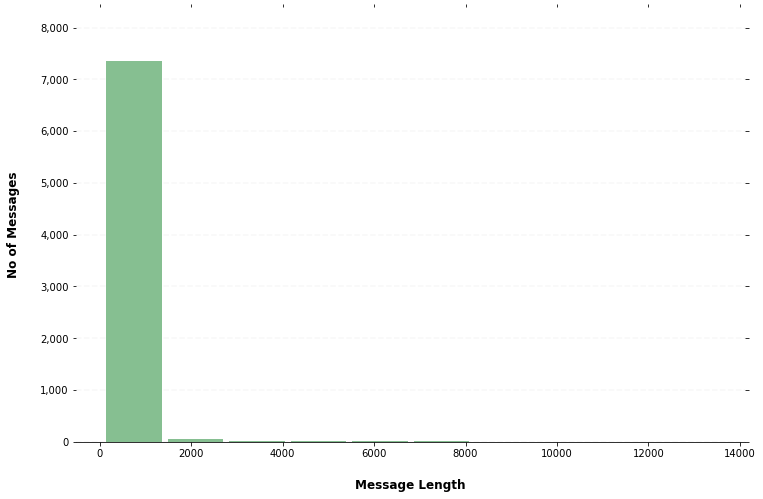

In [65]:
# Let's draw a histogram to visualize the distribution of our data  

ax = text_corpus_df.hist(column='m_length', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    # Remove title
    x.set_title("")
    # Set x-axis label
    x.set_xlabel("Message Length", labelpad=20, weight='bold', size=12)
    # Set y-axis label
    x.set_ylabel("No of Messages", labelpad=20, weight='bold', size=12)
    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Some thoughts on the preprocessing results above, 
1. Out of the 13,000 odd messages, most messages were either bot announcements or were too short to be useful. 
2. Almost 99% of the messages have a character length of less than 2000. 
3. We keep the outliers in our dataset since our data is pretty darn small anyway. 

In [66]:
text_corpus_df.head(50)

,message,m_length
2,has joined the channel set the channel topic ...,273
3,has joined the channel isn t there a way we c...,201
4,no i didn t find a way if can help in finding...,90
7,has joined the channel this is my first time ...,120
26,excited to be the part of this can someone sh...,125
35,hi the idea of 60 days of udacity is to post ...,177
40,it would be really helpful for of us if we ca...,156
49,the projects you work upon like a log in gith...,315
50,why to put in social media it would be much b...,209
57,adding to what said it s a great way to keep ...,182


In [68]:
# To train the GPT-2 model, we need the CSV file containing only a single column. 
# In our case, we need to keep 'message' and ignore all the other columns, 
text_corpus_df['message'].to_csv('./data/final_text_corpus.csv', index=False)

print('File Write Complete!')

C:\Anaconda3\envs\my_NLP\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


File Write Complete!
